# Neural Network
A partire dal dataset processato applichiamo una neural network per predirre la classe di appartenenza


In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("dataset/CL-dataset.csv",sep='\t',decimal=",",index_col=0)
df = df.drop(columns=["CustomerID"])

In [90]:
df.head()

,Imax,E,PIL,Mb,MeanD,EDate,class
0,12,4.335643,2.567,156.860294,0.000000,0.000000,2
1,32,6.503112,2.567,356.232222,35.000000,2.226424,2
2,360,6.504979,2.752,442.969333,24.266667,2.235084,2
3,80,4.494680,2.567,189.650000,55.400000,1.177965,1
4,32,0.000000,2.567,292.000000,13.000000,0.918296,1


In [91]:
from sklearn.model_selection import train_test_split

label = df.pop('class')
train_set, test_set, train_label, test_label = train_test_split(df, label, stratify =label, test_size=0.30)

In [92]:
from itertools import product
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop, Adam, SGD
from tensorflow.keras.layers import Dense, Dropout, InputLayer


In [93]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import utils

encoder = LabelEncoder()
encoder.fit(train_label)
encoded_Y = encoder.transform(train_label)
train_label = utils.to_categorical(encoded_Y)

encoder = LabelEncoder()
encoder.fit(test_label)
encoded_Y = encoder.transform(test_label)
test_label = utils.to_categorical(encoded_Y)

## Grid Search

In [94]:

grid_params = {
                'hidden_layers': [1, 2,3],
                'hidden_units': [64,128,256],
                'act_funct': ['relu', 'tanh'],
                'learning_rate': [1e-6, 1e-5, 1e-7],
                'optimizer': [Adam, RMSprop]
            }
keys, values = zip(*grid_params.items())
params_list = [dict(zip(keys, v)) for v in product(*values)]

In [95]:
for idx, params in enumerate(params_list):

    #Parametri
    hidden_layers = params['hidden_layers']
    hidden_units = params['hidden_units']
    act_funct = params['act_funct']
    learning_rate = params['learning_rate']
    optimizer = params['optimizer']

    #Creazione del modello
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Flatten(input_shape=(1, 6)))

    for i in range(0, hidden_layers):
        model.add(Dense(hidden_units, activation = act_funct))
        model.add(tf.keras.layers.Dropout(0.2))

    model.add(Dense(3, activation = 'softmax')) #Inserire softmax di 3 neuroni

    model.compile(optimizer=optimizer(learning_rate=learning_rate),
                loss='categorical_crossentropy',
                metrics=['accuracy'])

    # Allenamento
    #y_train = np.asarray(train_label).astype('float32').reshape((-1,1))
    history = model.fit(train_set, train_label,epochs=2,validation_split=0.2)

    #Plot
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)
    
    plt.figure()
    plt.plot(epochs, acc, 'b', label='Training Acc')
    plt.plot(epochs, val_acc, 'r', label='Validation Acc')
    plt.title("LR: "+str(learning_rate)+" ACT: "+act_funct+" LAYER: "+ str(hidden_layers)+ " UNITS: "+ str(hidden_units))


    plt.xlabel('Epochs')
    plt.ylabel('Acc')
    plt.legend()
    plt.savefig("./nn_grid/plt"+str(idx)+".png")

 it was called on an input with incompatible shape (None, 6).
98/98 [==============================] - 0s 4ms/step - loss: 47.9067 - accuracy: 0.2957 - val_loss: 39.2371 - val_accuracy: 0.2394
Epoch 2/2
98/98 [==============================] - 0s 2ms/step - loss: 48.7246 - accuracy: 0.2884 - val_loss: 39.0191 - val_accuracy: 0.2394
Epoch 1/2
98/98 [==============================] - 0s 3ms/step - loss: 95.3725 - accuracy: 0.4678 - val_loss: 80.9836 - val_accuracy: 0.4891
Epoch 2/2
98/98 [==============================] - 0s 1ms/step - loss: 90.4377 - accuracy: 0.4662 - val_loss: 77.2487 - val_accuracy: 0.4853
Epoch 1/2
98/98 [==============================] - 0s 3ms/step - loss: 112.5337 - accuracy: 0.1685 - val_loss: 109.2744 - val_accuracy: 0.1805
Epoch 2/2
98/98 [==============================] - 0s 2ms/step - loss: 109.1075 - accuracy: 0.1689 - val_loss: 105.2613 - val_accuracy: 0.1805
Epoch 1/2
98/98 [==============================] - 0s 3ms/step - loss: 56.8525 - accuracy: 0.3963 

KeyboardInterrupt: 

## Allenamento finale

In [82]:
import tensorflow as tf
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(1, 6)),
  tf.keras.layers.Dense(128, activation='sigmoid'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(128, activation='sigmoid'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(128, activation='sigmoid'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(3, activation='softmax')# Inserire softmax 3 neuroni
])
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [83]:
history = model.fit(train_set, train_label,
                    epochs=500,
                    batch_size=512,
                    validation_split=0.2)

loss: 0.2220 - val_accuracy: 0.9117
Epoch 360/500
7/7 [==============================] - 0s 9ms/step - loss: 0.2370 - accuracy: 0.8975 - val_loss: 0.2206 - val_accuracy: 0.9117
Epoch 361/500
7/7 [==============================] - 0s 10ms/step - loss: 0.2428 - accuracy: 0.8971 - val_loss: 0.2194 - val_accuracy: 0.9142
Epoch 362/500
7/7 [==============================] - 0s 9ms/step - loss: 0.2335 - accuracy: 0.9004 - val_loss: 0.2175 - val_accuracy: 0.9181
Epoch 363/500
7/7 [==============================] - 0s 9ms/step - loss: 0.2418 - accuracy: 0.8955 - val_loss: 0.2395 - val_accuracy: 0.9065
Epoch 364/500
7/7 [==============================] - 0s 8ms/step - loss: 0.2510 - accuracy: 0.8939 - val_loss: 0.3059 - val_accuracy: 0.8784
Epoch 365/500
7/7 [==============================] - 0s 9ms/step - loss: 0.3135 - accuracy: 0.8795 - val_loss: 0.2377 - val_accuracy: 0.9091
Epoch 366/500
7/7 [==============================] - 0s 9ms/step - loss: 0.2673 - accuracy: 0.8818 - val_loss: 0.2346

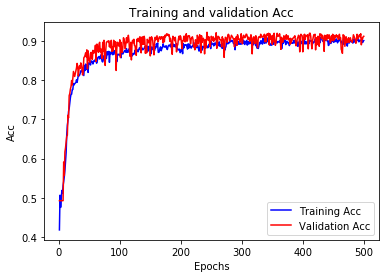

In [84]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'b', label='Training Acc')
plt.plot(epochs, val_acc, 'r', label='Validation Acc')
plt.title('Training and validation Acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

In [85]:
test_pred = model.predict_classes(test_set)

In [86]:
from sklearn.metrics import classification_report
print(classification_report(encoder.inverse_transform(encoded_Y),test_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       859
           1       0.86      0.88      0.87       529
           2       0.91      0.85      0.88       285

    accuracy                           0.91      1673
   macro avg       0.91      0.89      0.90      1673
weighted avg       0.91      0.91      0.91      1673

